https://www.kaggle.com/code/rukiaski/basic-titanic-with-sklearn

In this tutorial kernel I've used some machine learning models with Scikit Learn library. This is the sequence of this kernel:
1. Import packages and load data.
2. Pre-processing data. 
3. Machine learn models. 
4. Checking models accuracy. 
5. Save submission. 

If I help you with this kernel, don't forget to upvote it. Feel free to fork it and edit as you like.

# 1. Import packages and load data
Initially, I prefer to use only **pandas** and **sklearn** libraries because I want to make this tutorial simple and easy to understand. You can fork and modify this using packages that you prefer.

In [1]:
# data processing, CSV file I/O (e.g. pd.read_csv)
# For convention, pandas always import using alias pd
import pandas as pd 

# To visualize graphs
import matplotlib.pyplot as plt

# Models used
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Checking available directories
import os
for dirname, _, filenames in os.walk("data"):
    for filename in filenames:
        print(os.path.join(dirname, filename))


data\gender_submission.csv
data\test.csv
data\train.csv


In [2]:
#Load data with pandas
train_data = pd.read_csv("data/train.csv")
test_data_complete = pd.read_csv("data/test.csv")

In [3]:
train_data.head()
# View the top rows of our dataset. Default value is 5. 
# If want to you view more or less, you can especify the value like 
# train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data_complete.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 2. Pre-processing data
In data science, pre-processing means basically select the fields that we will use, clear the data, handle null values and outliers, scaling data, etc. For this tutorial, I just used basic pre-processing techniques.

In [5]:
# Remove columns that will not be use 
train_data = train_data.drop(['Name','Ticket', 'Cabin'], axis=1)
test_data_complete = test_data_complete.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# I could use also
# train_data.drop(['Name','Ticket', 'Cabin'], axis=1, inplace=True)
# Using this, I don't need to save the modifications in a variable, because parameter inplace=True
# meaning that all modifications is automatically saved in data set.

In [6]:
# Tranform data using one-hot encoding.
# This part is important because machine learning models works with numbers, and in this dataset some columns
# has values objects, like Sex (male or female) and Embarked (Q, S, C).

train_data = pd.get_dummies(train_data)
test_data_complete = pd.get_dummies(test_data_complete)

In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,2,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [8]:
test_data_complete.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,False,True,False,True,False
1,893,3,47.0,1,0,7.0000,True,False,False,False,True
2,894,2,62.0,0,0,9.6875,False,True,False,True,False
3,895,3,27.0,0,0,8.6625,False,True,False,False,True
4,896,3,22.0,1,1,12.2875,True,False,False,False,True


In [9]:
# Verifying null values
train_data.isnull().sum().sort_values(ascending=False)

Age            177
PassengerId      0
Survived         0
Pclass           0
SibSp            0
Parch            0
Fare             0
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [10]:
#Filling null values with mean
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())

> It's important to notice that all pre processing make in train data must be make in test data too.

In [11]:
test_data_complete.isnull().sum().sort_values(ascending=False)

Age            86
Fare            1
PassengerId     0
Pclass          0
SibSp           0
Parch           0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [12]:
test_data_complete['Age'] = test_data_complete['Age'].fillna(test_data_complete['Age'].mean())
test_data_complete['Fare'] = test_data_complete['Fare'].fillna(test_data_complete['Fare'].mean())

In [13]:
# Separating features and targets
x_features = train_data.drop(['PassengerId','Survived'], axis=1)
y_targets = train_data['Survived']

In [14]:
x_features.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,True


# 3. Machine Learning Models
Machine Learn Models can be classified basically as supervised learning, unsupervised learning and reinforcement learning. In this kernel I use only supervised models, meaning that inputs and outputs is known. To get different results, you can modify the classifier parameters. All links to documentation is in the description of each classifier. I include too a simple concept for each model and a link with more informations.

### 3.1 Decision Tree Classifier
> *"Decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome."*  

Concept available in [DataCamp](https://www.datacamp.com/community/tutorials/decision-tree-classification-python)

Link to [Documentation Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [15]:
tree_classifier = DecisionTreeClassifier(max_depth=5, random_state=0)
tree_classifier.fit(x_features, y_targets)

DecisionTreeClassifier(max_depth=5, random_state=0)

### 3.2 Random Forest Classifier
> *"Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance."* 

Concept available in [DataCamp](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)

Link to [Documentation Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) 

In [16]:
forest_classifier = RandomForestClassifier(n_estimators=300, max_depth=3, random_state=0)
forest_classifier.fit(x_features, y_targets)

RandomForestClassifier(max_depth=3, n_estimators=300, random_state=0)

### 3.3. Gradient Boosting Classifier
> *"Gradient Boosting trains many models in a gradual, additive and sequential manner."*

Concept available in [Towards Data Science](https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab)

Link to [Documentation Gradient Boostings Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

In [17]:
gbc_classifier = GradientBoostingClassifier(n_estimators=300, max_depth=3, random_state=0)
gbc_classifier.fit(x_features, y_targets)

GradientBoostingClassifier(n_estimators=300, random_state=0)

### 3.4 Naive Bayes Classifier
> *"Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other. (...) Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred."*

Concept available in [GeeksforGeeks](https://www.geeksforgeeks.org/naive-bayes-classifiers/)

Link to [Documentation Naive Bayes Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)

In [18]:
# Naive Bayes Classifier
naive_classifier = GaussianNB()
naive_classifier.fit(x_features, y_targets)

GaussianNB()

### 3.5 Support Vector Machine
> *"A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data, the algorithm outputs an optimal hyperplane which categorizes new examples."*

Concept available in [Machine Learning 101](https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72)

Link to [Documentation SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [19]:
svc_classifier = SVC(C=5,gamma=10)
svc_classifier.fit(x_features, y_targets)

SVC(C=5, gamma=10)

### 3.6 KNN Classifier
> *"The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other."*

Concept available in [Towards Data Science](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)

Link to [Documentation KNN Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [20]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_features, y_targets)

KNeighborsClassifier(n_neighbors=3)

### 3.7 MLP Classifier
> "A multilayer perceptron (MLP) is a class of feedforward artificial neural network. An MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function."

Concept available in [Wikipedia](https://en.wikipedia.org/wiki/Multilayer_perceptron)

Link to [Documentation MLP Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [21]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(7,2), activation='relu',solver='adam', max_iter=300,
                               random_state=0, batch_size=250)
mlp_classifier.fit(x_features, y_targets)

c:\Users\bspeziale\AppData\Local\pypoetry\Cache\virtualenvs\08-tabular-classification-todo-jL5EAOgR-py3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=250, hidden_layer_sizes=(7, 2), max_iter=300,
              random_state=0)

# 4. Checking Models Accuracy
I ran all models with differents configurations, and this is my results.

In [22]:
results = pd.read_csv("data/gender_submission.csv")

In [23]:
test_target = results['Survived']
test_data = test_data_complete.drop('PassengerId', axis=1)

In [24]:
tree_score_test = tree_classifier.score(test_data, test_target)
forest_score_test = forest_classifier.score(test_data, test_target)
gbc_score_test = gbc_classifier.score(test_data, test_target)
naive_score_test = naive_classifier.score(test_data, test_target)
svc_score_test = svc_classifier.score(test_data, test_target)
knn_score_test = knn_classifier.score(test_data, test_target)
mlp_score_test = mlp_classifier.score(test_data, test_target)

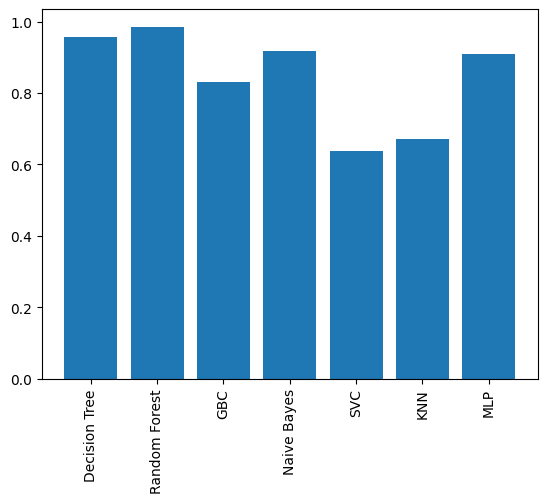

In [25]:
# Using matplotlib to visualize the best score
names = ['Decision Tree', 'Random Forest', 'GBC', 'Naive Bayes', 'SVC', 'KNN', 'MLP']
values = [tree_score_test, forest_score_test, gbc_score_test, naive_score_test, svc_score_test, 
         knn_score_test, mlp_score_test]

plt.bar(names,values)
plt.tick_params(axis ='x', rotation = 90)
plt.show()